In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.api as sms
import scipy.stats
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from scipy.stats import ttest_1samp , shapiro , levene , ttest_ind ,mannwhitneyu ,pearsonr,spearmanr,kendalltau,f_oneway,kruskal

C:\Users\can\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("C:/Users/can/Desktop/Marketing_Data.csv")
df = data.copy()

In [3]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [5]:
df.shape

(171, 4)

In [6]:
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

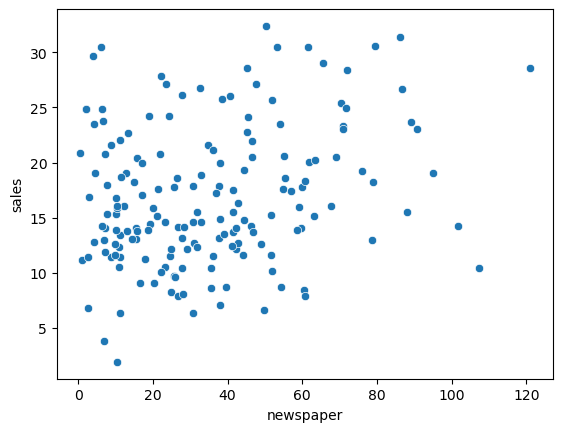

In [7]:
sns.scatterplot(data = df , x="newspaper",y="sales")

<AxesSubplot:xlabel='facebook', ylabel='sales'>

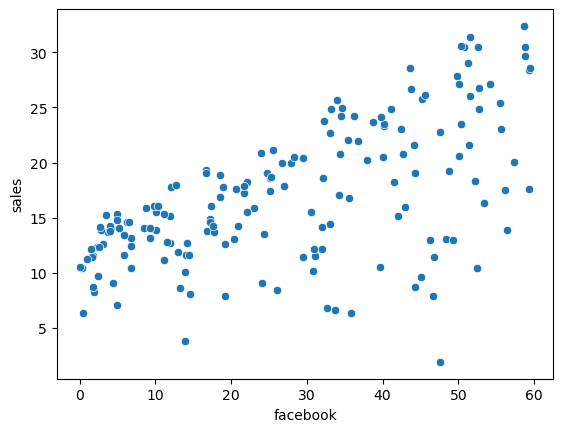

In [8]:
sns.scatterplot(data = df , x="facebook",y="sales")

<AxesSubplot:xlabel='facebook', ylabel='sales'>

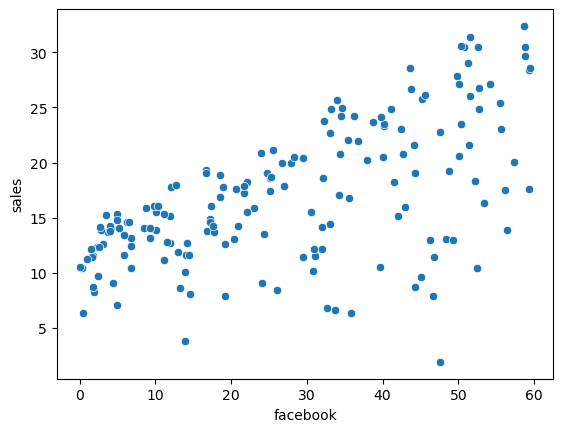

In [9]:
sns.scatterplot(data = df , x="facebook",y="sales")

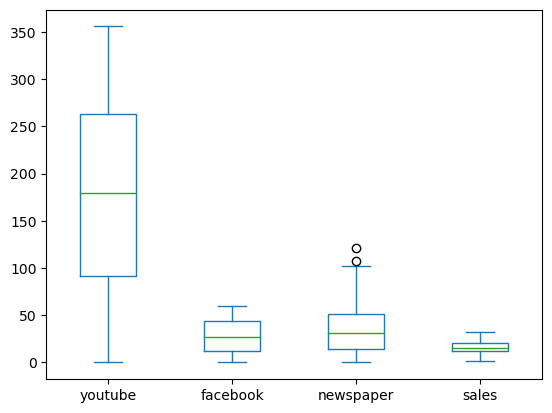

In [10]:
df.plot(kind='box')
plt.show()

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

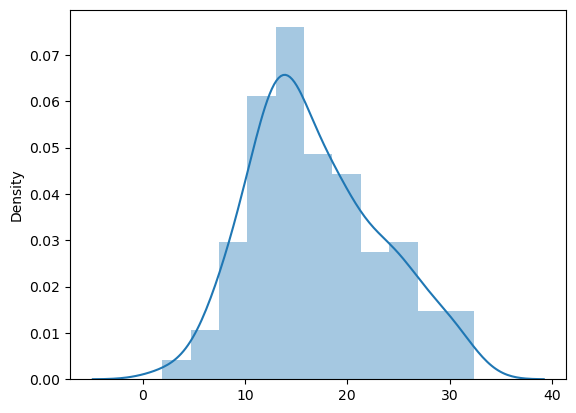

In [11]:
sns.distplot(df[["sales"]])





<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Bağımlı değişken normal dağılımlı mı ?
</h1>





 



In [12]:
test_stat, pvalue = shapiro(df["sales"])
print('Sales  p-value = %.4f' % ( pvalue))

Sales  p-value = 0.0039






<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">p-value varsayılan alfa değeri olan 0.05'den küçük olduğu için veri normal dağılımlı değildir.





 






<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:250%;text-align:left;color:#FFFFFF">Model katsayılarını belirleme
</h1>





 


In [13]:
df.shape

(171, 4)

In [14]:
np_data_array = pd.DataFrame(df).to_numpy()
print(np_data_array.shape)

(171, 4)


In [15]:
train_X_feat = df.iloc[:160,:3]
train_y_feat = df.iloc[:160,3:]

In [16]:
train_X_feat.shape

(160, 3)

In [17]:
train_y_feat.shape

(160, 1)

In [18]:
test_X_feat = df.iloc[160:np_data_array.shape[0],:3]
test_y_feat = df.iloc[160:np_data_array.shape[0],3:]

In [19]:
test_X_feat.shape

(11, 3)

In [20]:
test_y_feat.shape

(11, 1)





<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 20px 20px;color:#FFFFFF">B^ = (X'X)-¹ * X'y
</h1>





 

In [21]:
X = np.ones(shape=(train_X_feat.shape[0],1))

In [22]:
transform_X_feat = np.hstack((X,train_X_feat))
transform_X_feat

array([[  1.  ,  84.72,  19.2 ,  48.96],
       [  1.  , 351.48,  33.96,  51.84],
       [  1.  , 135.48,  20.88,  46.32],
       [  1.  , 116.64,   1.8 ,  36.  ],
       [  1.  , 318.72,  24.  ,   0.36],
       [  1.  , 114.84,   1.68,   8.88],
       [  1.  , 348.84,   4.92,  10.2 ],
       [  1.  , 320.28,  52.56,   6.  ],
       [  1.  ,  89.64,  59.28,  54.84],
       [  1.  ,  51.72,  32.04,  42.12],
       [  1.  , 273.6 ,  45.24,  38.4 ],
       [  1.  , 243.  ,  26.76,  37.92],
       [  1.  , 212.4 ,  40.08,  46.44],
       [  1.  , 352.32,  33.24,   2.16],
       [  1.  , 248.28,  10.08,  31.68],
       [  1.  ,  30.12,  30.84,  51.96],
       [  1.  , 210.12,  27.  ,  37.8 ],
       [  1.  , 107.64,  11.88,  42.84],
       [  1.  , 287.88,  49.8 ,  22.2 ],
       [  1.  , 272.64,  18.96,  59.88],
       [  1.  ,  80.28,  14.04,  44.16],
       [  1.  , 239.76,   3.72,  41.52],
       [  1.  , 120.48,  11.52,   4.32],
       [  1.  , 259.68,  50.04,  47.52],
       [  1.  , 

In [23]:
transpose_X = np.transpose(transform_X_feat ,axes = None)
transpose_X

array([[  1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,
          1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  ,   1.  , 

In [24]:
X_transform_X = np.dot(transpose_X , transform_X_feat)
X_transform_X

array([[1.60000000e+02, 2.88906000e+04, 4.47480000e+03, 5.81052000e+03],
       [2.88906000e+04, 6.86644864e+06, 8.24399582e+05, 1.08281557e+06],
       [4.47480000e+03, 8.24399582e+05, 1.75463453e+05, 1.83118421e+05],
       [5.81052000e+03, 1.08281557e+06, 1.83118421e+05, 3.08539454e+05]])

In [25]:
resultant_XtX = np.linalg.inv(X_transform_X)
resultant_XtX

array([[ 4.51573706e-02, -1.00188845e-04, -4.21273964e-04,
        -2.48780956e-04],
       [-1.00188845e-04,  6.11133324e-07, -1.23581470e-07,
        -1.84629065e-07],
       [-4.21273964e-04, -1.23581470e-07,  2.17840497e-05,
        -4.56156914e-06],
       [-2.48780956e-04, -1.84629065e-07, -4.56156914e-06,
         1.12814528e-05]])

In [26]:
X_transpose_y = np.dot(transpose_X,train_y_feat)
X_transpose_y

array([[  2726.76  ],
       [570820.392 ],
       [ 86664.5136],
       [104892.12  ]])

In [27]:
B_katsayilari = np.dot(resultant_XtX,X_transpose_y)

In [28]:
print(B_katsayilari)

[[3.33881109]
 [0.04558017]
 [0.1901756 ]
 [0.00425333]]


In [29]:
B0_katsayi = B_katsayilari[0]

In [30]:
 print("B0 katsayisi :" , B0_katsayi)

B0 katsayisi : [3.33881109]


In [31]:
bn_katsayi = B_katsayilari[[1,2,3]]

In [32]:
data = pd.read_csv("C:/Users/can/Desktop/Marketing_Data.csv")
df = data.copy()

In [33]:
X = df.drop(df[["sales"]],axis=1)
y = df[["sales"]]

In [34]:
coef_MLR = pd.DataFrame(bn_katsayi,X.columns,columns=["Parametreler"])

In [35]:
coef_MLR

,Parametreler
youtube,0.045580
facebook,0.190176
newspaper,0.004253


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:250%;text-align:left;color:#FFFFFF">Model
</h1>






<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:center;color:#FFFFFF">Y = 3.33881109 + 0.045580*Youtube +  0.190176*Facebook + 0.004253*Newspaper
</h1>





 



<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:250%;text-align:center;color:#FFFFFF">Regresyon Anlamlılık Testi
</h1>



In [36]:
import statsmodels.api as sm
X_c = sm.add_constant(X) 
LR_OLS = sm.OLS(y,X_c)
LR_OLS_results = LR_OLS.fit()
LR_OLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     503.7
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           2.09e-83
Time:                        22:37:13   Log-Likelihood:                -359.99
No. Observations:                 171   AIC:                             728.0
Df Residuals:                     167   BIC:                             740.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5059      0.400      8.772      0.000       2.717       4.295
youtube        0.0452      0.002     29.830      0.000       0.042       0.048
facebook       0.1884      0.009     20.895      0.000       0.171       0.206
newspaper      0.0043      0.007      0.658      0.511      -0.009       0.017
==============================================================================
Omnibus:                       57.934   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.792
Skew:                          -1.388   Prob(JB):                     4.47e-36
Kurtosis:                       6.891   Cond. No.                         544.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Prob(F-statics) 0.05'den küçük olduğu için model anlamlıdır
</h1>

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF"> Modelin açıklanma katsayısının %90 olduğu söylenebilir.
</h1>

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF"> Youtube'un p-value değeri 0.05'den küçük olduğu için model için anlamlıdır.
</h1>

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Facebook'un p-value değeri 0.05'den küçük olduğu için model için anlamlıdır.
</h1>

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF"> Newspaper'in p-value değeri 0.05'den büyük olduğu için model için anlamlı değildir
</h1>


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Prob(Omnibus) 0.05'den küçük olduğu için hatalar normal dağılımlı değildir.
</h1>

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Skew değeri -1.388 olduğu için veri kümesi simetrik değildir.
</h1>

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:250%;text-align:left;color:#FFFFFF">Jargue-Bera Testi = Normallik testi gerçekleştirirken çarpıklık ve basıklık katsayılarından yararlanır . Çarpıklık değerimiz 0 , basıklık değeri de 3'den uzaklastıkca verilerimizin normal dağılma olasılıgı da azalacaktır.
</h1>

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">H0: Dağılım normal , çarpıklığın 0 , basıklığın 3 olduğudur.


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">P(JB) = 4.47e-36 0.05'DEN küçük olduğu için H0 reddedilir.


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Durbin WATSON 2 civarında olduğundan otokorelasyon yoktur.

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Cond no : 30'dan büyük olduğu için çoklu bağlantıya sahip olabileceği kabul edilir.

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Çoklu bağlantı problemi sorgulama :

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:250%;text-align:left;color:#FFFFFF">VIF = 1 / 1-Açıklanma katsayısı(R2)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Değişken'] = X.columns
vif


,VIF,Değişken
0,2.679924,youtube
1,3.069419,facebook
2,2.954567,newspaper


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">VIF Değerleri 10'dan küçük olduğu için çoklu bağlantı problemi bulunmamaktadır.

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:250%;text-align:left;color:#FFFFFF">ANOVA

In [38]:
model = ols("y ~ X", df).fit()

In [39]:
anova_results = anova_lm(model)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
X,3.0,6103.984713,2034.661571,503.658112,2.089355e-83
Residual,167.0,674.641139,4.039767,NaN,NaN


 <h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:250%;text-align:left;color:#FFFFFF">H0 : B1=B2=Bn=0 
    

 <h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:250%;text-align:left;color:#FFFFFF">F > PR(F) ise H0 reddedilir. 
    

 <h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:250%;text-align:left;color:#FFFFFF">H0 reddedilir, model anlamlıdır. 
    